In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv

%matplotlib inline

In this notebook, we will deal with dirty datasets and try to turn them into cleaner structures. All the datasets in this notebook are from https://github.com/LinkedInLearning/data_cleaning_python_2883183

Convert the following string to csv format and convert it into a dataframe

In [189]:
shop_card = '''date,name,amount,price
2021-03-01,carrot,7,5.73
2021-03-01,egg,12,1.7
2021-03-01,milk,,3.57
2021-03-01,potato,2,
,tomato,6,1.52
2021-03-02,potato,3,2.17
2021-03-03,,5,3.68'''

In [190]:
reader = csv.reader(shop_card.splitlines())

In [191]:
df = pd.DataFrame(list(reader))
df

,0,1,2,3
0,date,name,amount,price
1,2021-03-01,carrot,7,5.73
2,2021-03-01,egg,12,1.7
3,2021-03-01,milk,,3.57
4,2021-03-01,potato,2,
5,,tomato,6,1.52
6,2021-03-02,potato,3,2.17
7,2021-03-03,,5,3.68


Set the first row as header and drop it

In [192]:
df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)

In [193]:
df

,date,name,amount,price
1,2021-03-01,carrot,7,5.73
2,2021-03-01,egg,12,1.7
3,2021-03-01,milk,,3.57
4,2021-03-01,potato,2,
5,,tomato,6,1.52
6,2021-03-02,potato,3,2.17
7,2021-03-03,,5,3.68


Convert the columns to their original datatypes

In [194]:
df['date'] = pd.to_datetime(df.date)

In [195]:
df.amount = pd.to_numeric(df.amount)
df.price = pd.to_numeric(df.price)

In [196]:
df.amount

1     7.0
2    12.0
3     NaN
4     2.0
5     6.0
6     3.0
7     5.0
Name: amount, dtype: float64

Note note that df.amount is in float format although all values are integer except a null value. This is because we don't have a special missing value for integers. We can convert it back to int32 as follows

In [197]:
df['name'] = df.name.astype(str)

In [198]:
df.isnull().any()

0
date       True
name      False
amount     True
price      True
dtype: bool

Although the name column has a one missing value, since we set shop_card as a string at the start, the null value are typed as an empty string "" instead of an actual null value.

Check if the rows have a missing value

In [199]:
df.isnull().any(axis=1)

1    False
2    False
3     True
4     True
5     True
6    False
7    False
dtype: bool

Read the new dataset from a github page 

In [141]:
url_data = (r'https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch01/01_03/metrics.csv')
df = pd.read_csv(url_data, parse_dates=True)
df.head()

,time,name,value
0,2021-07-13 14:36:52.380,mem,2.275172e+08
1,2021-07-13 14:36:52.380,cpu,3.157000e+01
2,2021-07-13 14:36:53.337,mem,2.275192e+08
3,2021-07-13 14:36:53.337,cpu,3.009000e+02
4,2021-07-13 14:36:54.294,mem,2.275157e+08


In [142]:
df.isnull().any()

time     False
name     False
value    False
dtype: bool

In [145]:
df.groupby('name').describe()

value                                                                  \
     count          mean           std     min           25%           50%   
name                                                                         
CPU    1.0  3.040000e+01           NaN   30.40  3.040000e+01  3.040000e+01   
cpu   49.0  3.645633e+01  3.977927e+01  -32.14  2.956000e+01  3.157000e+01   
mem   50.0  2.229711e+08  3.217637e+07  295.00  2.275070e+08  2.275188e+08   

                                 
               75%          max  
name                             
CPU   3.040000e+01         30.4  
cpu   3.507000e+01        300.9  
mem   2.275342e+08  227556054.0

We can notice that there is an additional uppercase values for cpu, and the minimum value for cpu is negative, which is likely a bad data. First, get the number of rows where cpu is uppercase.

In [148]:
df.name.value_counts()

mem    50
cpu    49
CPU     1
Name: name, dtype: int64

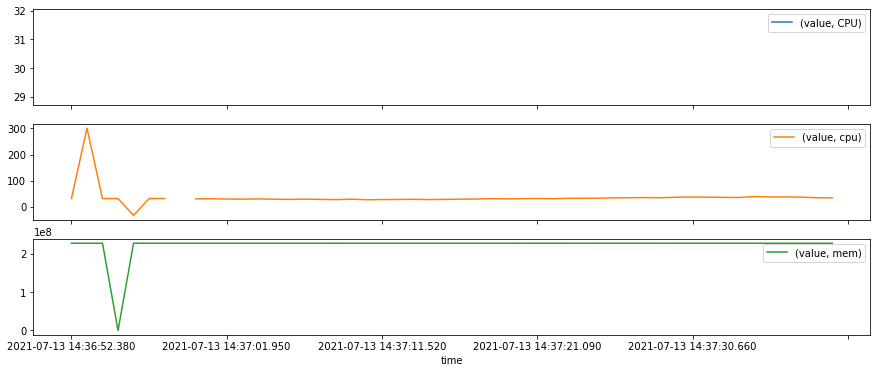

In [159]:
pd.pivot(df, index='time', columns='name').plot(subplots=True, figsize=(15,6));

These data viz can help us better to see the outliers in cpu. Now find those bad data with a query.

In [173]:
df.query('name == "cpu" & (value < 0 | value > 100)')

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [172]:
# Alternatively
df[(df.name == 'cpu') & ((df.value < 0) |( df.value > 100))]

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


Calculate z score for memory and find bad entry (those that are off the mean value by at least two times standard deviation)

In [186]:
mem = df[df.name == 'mem'].value
z_mem = (mem - mem.mean()) / mem.std()
bad_mem = mem[z_mem.abs() > 2]
bad_mem

6    295.0
Name: value, dtype: float64

Find the duplicates from the cart dataset

In [206]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch01/01_04/cart.csv', parse_dates=True)
df

,date,name,amount,price
0,2021-03-01,carrot,7,5.73
1,2021-03-01,egg,12,1.70
2,2021-03-01,egg,12,1.20
3,2021-03-01,milk,1,3.57
4,2021-03-02,potato,3,2.17
5,2021-03-02,potato,3,2.17


In [207]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

Additionally, we can find duplicates regarding only specified columns

In [208]:
df.duplicated(['name', 'amount'])

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

Validate the data in the ship dataset

In [260]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_01/ships.csv')
df

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


In [261]:
df.dtypes

name     object
lat     float64
lng     float64
dtype: object

Define a schema for the ship dataset and put it into a validation test.

In [263]:
import pandera as pa

schema = pa.DataFrameSchema({
    'name': pa.Column(pa.String),
    'lat': pa.Column(pa.Float, 
                     nullable=True, 
                     checks=pa.Check(
                         lambda v: v >= -90 and v <= 90, 
                         element_wise=True)
                    ),
    'lng': pa.Column(pa.Float, 
                     nullable=True,
                     checks=pa.Check(
                         lambda v: v >= -180 and v <= 180, 
                         element_wise=True)
                    )
})

schema.validate(df)

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN


Now, import the new ship dataset and check for null values

In [247]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_03/ships.csv')
df

,name,lat,lng
0,Black Pearl,20.664865,-80.709747
1,Cobra,20.664868,-80.709740
2,Flying Dutchman,20.664878,-80.709941
3,Empress,NaN,NaN
4,,20.664875,-80.709777


In [248]:
df.isnull().sum()

name    0
lat     1
lng     1
dtype: int64

We can see that isnull attribute doesn't notice the null value in the name column. Let's look at what we have in the last entry of name

In [249]:
df.iloc[-1]['name']

' '

Now, trim the white space in the last entry and check for the null values again

In [250]:
strip = df.name.str.strip() == ''
df.loc[strip, 'name'] = np.nan

df.isnull().any(axis=1)

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [251]:
df.isnull().any()

name    True
lat     True
lng     True
dtype: bool

In [244]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [265]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/data_cleaning_python_2883183/main/Ch03/03_05/heights.csv')
df

,name,grade,height
0,Adam,1,31.7
1,Beth,1,74.9
2,Chris,12,72.3
3,Dana,12,61.8


In [272]:
max_height = pd.DataFrame([[1, 32]], columns=['grade', 'max_height'])

merged = pd.merge(df, max_height, how='left')
merged[merged.height > merged.max_height]

,name,grade,height,max_height
1,Beth,1,74.9,32.0
